# Loading Packages

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [271]:
stress_df = pd.read_csv('Stress.csv')

In [272]:
stress_df.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087


In [273]:
stress_df.tail(5)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,1,0.571429,1488909516


# EDA

In [274]:
# Get summary statistics 
stress_df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [275]:
# Get summary statistics 
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


no null values in this dataset

In [276]:
# check how many categories in subreddit column
# and count the values of each Category 
stress_df['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

10 categories 

In [277]:
stress_df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

stress and no-stress relatively even.

<AxesSubplot:xlabel='label', ylabel='count'>

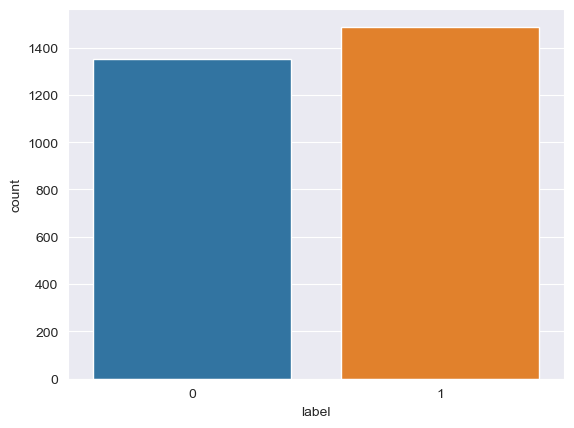

In [15]:
sns.set_style("darkgrid")
sns.countplot(data=stress_df,x=stress_df.label)

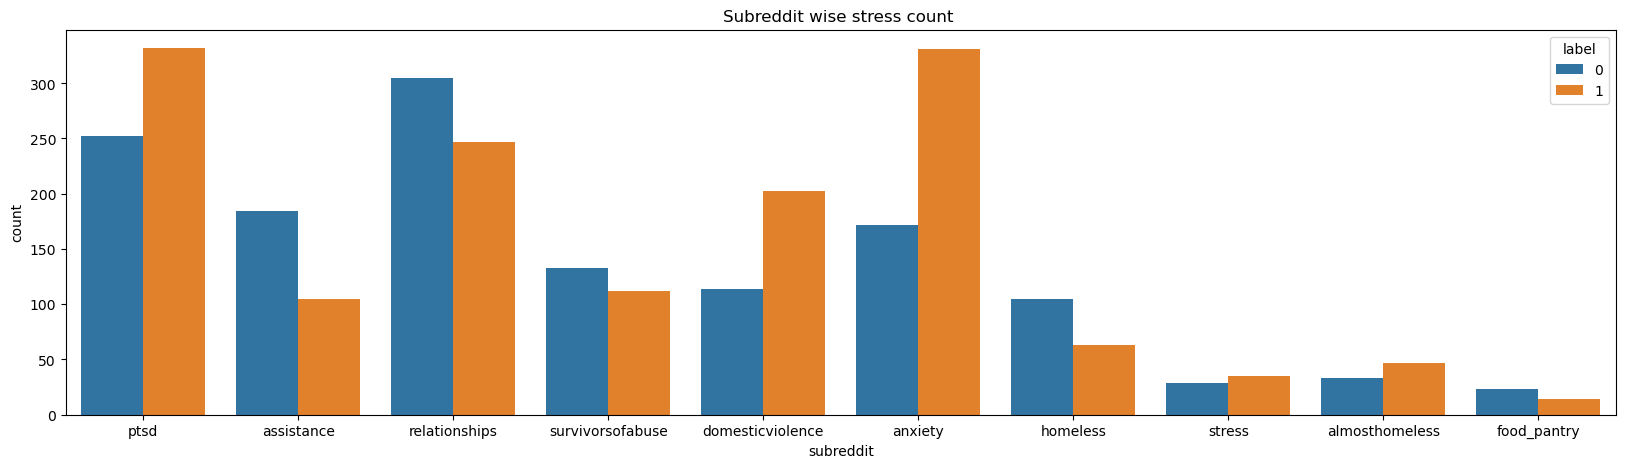

In [13]:
#visualise how the labels 0, 1 are distributed insubreddit
#reference code:

plt.figure(figsize=(20,5))
plt.title("Subreddit wise stress count ")
plt.xlabel("Subreddit")
sns.countplot(data=stress_df,x='subreddit',hue='label')
plt.show()

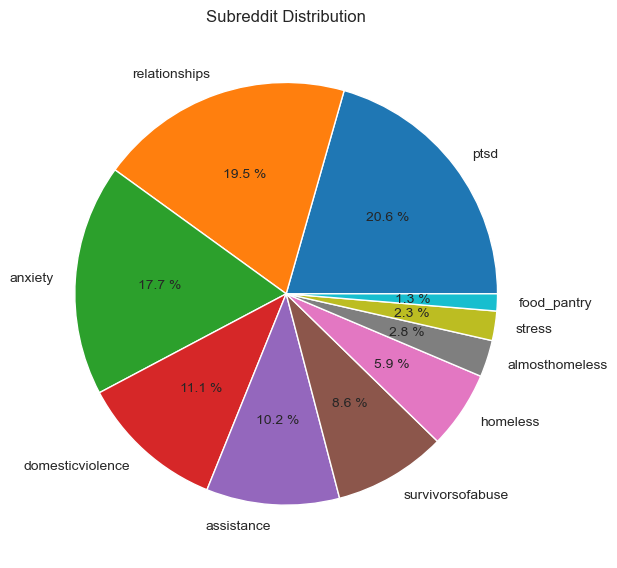

In [16]:
# subreddit Category distribution
# code reference

context=['subreddit']
plt.figure(figsize=(15,12))
for i in range(len(context)):
  plt.subplot(1,2,i+1)
  a=stress_df[context[i]].value_counts()
  title=a.index
  plt.title("Subreddit Distribution")
  plt.pie(x=a,labels=title,autopct="%.1f %%")
  plt.show()

In [17]:
stress_df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


# Feature Engineering

In [278]:
stress_df['stress_level'] = stress_df['label'].map({0:'No Stress',1:'Stress'})

In [279]:
stress_df['date']=[ datetime.fromtimestamp(value) for value in stress_df['social_timestamp']]

In [280]:
stress_df['day'] = [value for value in stress_df['date'].dt.day]
stress_df['month'] = [value for value in stress_df['date'].dt.month]
stress_df['year'] = [value for value in stress_df['date'].dt.year]

In [281]:
stress_df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,stress_level,date,day,month,year
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353,Stress,2018-03-21 17:39:13,21,3,2018
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,No Stress,2018-05-23 03:23:37,23,5,2018
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,Stress,2018-09-03 10:46:45,3,9,2018
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,Stress,2018-01-20 17:25:55,20,1,2018
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,Stress,2018-10-18 07:43:25,18,10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,No Stress,2018-01-06 08:17:24,6,1,2018
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412,Stress,2018-10-18 12:50:12,18,10,2018
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312,No Stress,2018-10-12 01:48:32,12,10,2018
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143,No Stress,2017-03-08 12:55:43,8,3,2017


In [282]:
remove_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp','date','day','month','year']

In [283]:
df1 = stress_df.drop(remove_cols, axis = 1)

In [284]:
df1

,text,label,stress_level
0,"He said he had not felt that way before, sugge...",1,Stress
1,"Hey there r/assistance, Not sure if this is th...",0,No Stress
2,My mom then hit me with the newspaper and it s...,1,Stress
3,"until i met my new boyfriend, he is amazing, h...",1,Stress
4,October is Domestic Violence Awareness Month a...,1,Stress
...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0,No Stress
2834,I don't have the ability to cope with it anymo...,1,Stress
2835,In case this is the first time you're reading ...,0,No Stress
2836,Do you find this normal? They have a good rela...,0,No Stress


In [285]:
df1['label'].unique()

array([1, 0])

In [165]:
df1.loc[0,'text']

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

# Text Preprocessing

In [166]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mingwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mingwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [239]:
def preprocess_text(text):
    # remove extraneous symbols (punctuation, special symbols)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # transform to lower case
    text = text.lower()

    # remove digits 
    text = ''.join(word for word in text if not word.isdigit())

    # tokenize the text into individual words
    tokens = word_tokenize(text)

    # remove stopwords (a, an, the etc.)
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    filtered_tokens = [token for token in tokens if not token in stop_words]

    # stem or lemmatize the filtered tokens
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove whitespace
    processed_tokens = [token.strip() for token in processed_tokens]

    # join the preprocessed tokens back into a string
    preprocessed_text = " ".join(processed_tokens)

    return preprocessed_text
    #return processed_tokens


In [286]:
def preprocess_text(text):
    # remove extraneous symbols (punctuation, special symbols)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # transform to lower case
    text = text.lower()

    # remove digits 
    #text = ''.join(word for word in text if not word.isdigit())

    # tokenize the text into individual words
    tokens = word_tokenize(text)

    # remove stopwords (a, an, the etc.)
    #stop_words = set(stopwords.words('english'))
    #stop_words.discard('not')
    #filtered_tokens = [token for token in tokens if not token in stop_words]

    # stem or lemmatize the filtered tokens
    #lemmatizer = WordNetLemmatizer()
    #processed_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove whitespace
    #processed_tokens = [token.strip() for token in processed_tokens]

    # join the preprocessed tokens back into a string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text
    #return processed_tokens


In [287]:
df1['text'].head(5)

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [288]:
df1['text'].head(5).apply(preprocess_text)

0    he said he had not felt that way before sugget...
1    hey there rassistance not sure if this is the ...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    october is domestic violence awareness month a...
Name: text, dtype: object

In [242]:
df0= df1['text'].head(1).apply(preprocess_text)

In [243]:
df0

0    he said he had not felt that way before sugget...
Name: text, dtype: object

In [244]:
length = len(df1['text'][0])
print(length)


571


In [245]:
length = len(df0[0])
print(length)


538


In [289]:
df1['clean_text']= df1['text'].apply(preprocess_text)

In [290]:
df1

,text,label,stress_level,clean_text
0,"He said he had not felt that way before, sugge...",1,Stress,he said he had not felt that way before sugget...
1,"Hey there r/assistance, Not sure if this is th...",0,No Stress,hey there rassistance not sure if this is the ...
2,My mom then hit me with the newspaper and it s...,1,Stress,my mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h...",1,Stress,until i met my new boyfriend he is amazing he ...
4,October is Domestic Violence Awareness Month a...,1,Stress,october is domestic violence awareness month a...
...,...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0,No Stress,her a week ago precious how are you i ignored ...
2834,I don't have the ability to cope with it anymo...,1,Stress,i dont have the ability to cope with it anymor...
2835,In case this is the first time you're reading ...,0,No Stress,in case this is the first time youre reading t...
2836,Do you find this normal? They have a good rela...,0,No Stress,do you find this normal they have a good relat...


In [74]:
length = len(df1['clean_text'][5])
print(length)


265


# Visualisation

In [76]:
from wordcloud import WordCloud

In [77]:
# Join all the words in the DataFrame into a single string
cleaned_text = ' '.join(df1['clean_text'])

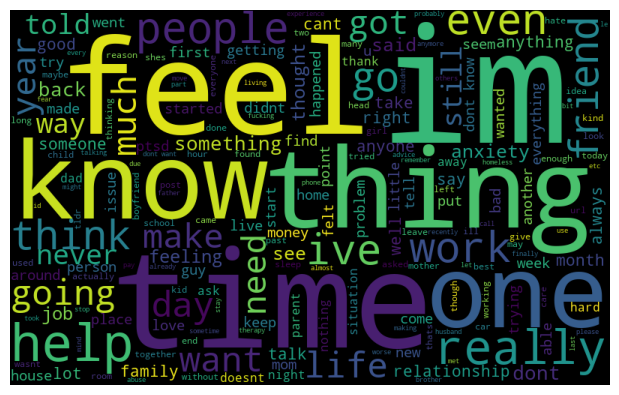

In [85]:
# Create a word cloud object
wordcloud = WordCloud(width=800, height=500).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [90]:
from collections import Counter

In [87]:
#Using a function that populates bar graph from a dataframe variable (reference the CoLab exercise )

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

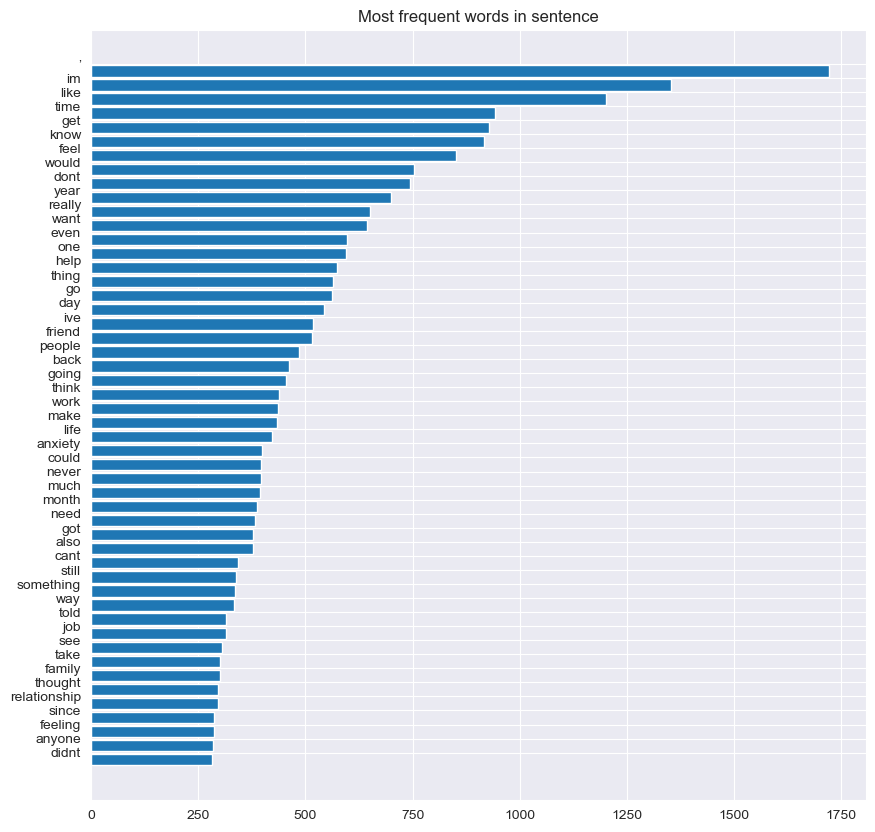

In [91]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df1,'clean_text',"Most frequent words in sentence")

In [92]:
df1

,text,label,stress_level,clean_text
0,"He said he had not felt that way before, sugge...",1,Stress,said felt way suggeted go rest trigger ahead y...
1,"Hey there r/assistance, Not sure if this is th...",0,No Stress,hey rassistance sure right place post go im cu...
2,My mom then hit me with the newspaper and it s...,1,Stress,mom hit newspaper shocked would know dont like...
3,"until i met my new boyfriend, he is amazing, h...",1,Stress,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,1,Stress,october domestic violence awareness month dome...
...,...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0,No Stress,week ago precious ignored jan happy year preci...
2834,I don't have the ability to cope with it anymo...,1,Stress,dont ability cope anymore im trying lot thing ...
2835,In case this is the first time you're reading ...,0,No Stress,case first time youre reading post looking peo...
2836,Do you find this normal? They have a good rela...,0,No Stress,find normal good relationship main problem see...


# Bag of Word (BoW)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

# create an instance of CountVectorizer
vectorizer = CountVectorizer()

# fit_transform on clean_text column
bow = vectorizer.fit_transform(df1['clean_text'])

# print the vocabulary
print(vectorizer.vocabulary_)


{'said': 7945, 'felt': 3419, 'way': 10120, 'suggeted': 8970, 'go': 3926, 'rest': 7701, 'trigger': 9557, 'ahead': 239, 'youire': 10446, 'hypocondriac': 4511, 'like': 5317, 'decide': 2239, 'look': 5414, 'feeling': 3410, 'doom': 2684, 'hope': 4391, 'maybe': 5608, 'getting': 3877, 'sucked': 8947, 'rabbit': 7251, 'hole': 4348, 'ludicrous': 5469, 'conspiracy': 1847, 'stupid': 8906, 'psychic': 7138, 'test': 9227, 'new': 6068, 'age': 211, 'something': 8543, 'could': 1979, 'even': 3135, 'laugh': 5202, 'road': 7819, 'ended': 2997, 'reading': 7354, 'sense': 8150, 'indicative': 4673, 'various': 9916, 'health': 4218, 'ailment': 242, 'one': 6288, 'prone': 7090, 'top': 9439, 'gloomi': 3919, 'fn': 3576, 'worried': 10348, 'heart': 4231, 'happen': 4149, 'physical': 6700, 'hour': 4438, 'hey': 4294, 'rassistance': 7318, 'sure': 9017, 'right': 7789, 'place': 6743, 'post': 6869, 'im': 4563, 'currently': 2136, 'student': 8891, 'intern': 4841, 'sandia': 7958, 'national': 5991, 'lab': 5148, 'working': 10337, '

In [99]:
import pandas as pd

# convert the vocabulary dictionary into a pandas dataframe
vocab_df = pd.DataFrame(list(vectorizer.vocabulary_.items()), columns=['Word', 'Count'])

# sort the dataframe by the count of occurrences of each word in descending order
vocab_df = vocab_df.sort_values(by='Count', ascending=False)

# show the top 50 most common words
print(vocab_df.head(50))


                    Word  Count
8320               zumba  10475
9329                zuko  10474
5569                 zoo  10473
3128                zone  10472
2348              zombie  10471
418               zoloft  10470
8229              zofran  10469
9808                 zip  10468
8418   zinsserengmancole  10467
6823               zines  10466
7822              zillow  10465
7541                  zi  10464
2623                zero  10463
5463                 zen  10462
9673             zealand  10461
9407                zack  10460
1457                zach  10459
10409               ywca  10458
2327                  yr  10457
3985               youve  10456
1663             youtube  10455
9702               youth  10454
5054                yous  10453
6117       yourselfthink  10452
79                 youre  10451
5605            youngest  10450
4427             younger  10449
1414               young  10448
526                youll  10447
8                 youire  10446
4788    

# Text Representation

### TF-IDF (Term Frequency - Inverse Document Frequency)

In [291]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [292]:
# Import the necessary libraries
import numpy as np # Used to manipulate and perform calculations on arrays/matrices

In [293]:
# First we need to append data from all the sets to create an entire corpus

# Create an empty array
X = np.array([], dtype=str) 

In [294]:
# Append text to the empty array
X = np.append(X, df1["clean_text"]) 

In [295]:
vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [296]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 12207


This means that there are 10476 unique tokens in our data set

In [297]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
he => 5133
said => 9322
had => 5026
not => 7311
felt => 4242


In [298]:
# Transform the text for each data split and store it in a variable

X = vectorizer.transform(df1["clean_text"]).toarray()


In [299]:
# The vector representation also known as a tf-idf matrix
print(X) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [300]:
# Extract the labels for each data and store it in a variable
y = df1['label'].to_numpy()

In [301]:
# Split Train and Test

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

In [302]:
# Import the necessary libraries

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.metrics import classification_report # Module to calculate performance metrics
from sklearn.metrics import confusion_matrix # Module to calculate the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Module to display the confusion matrix

import matplotlib.pyplot as plt # Module to help draw the confusion matrix

## Logistic Regression

In [303]:
# Load the model
lr_model = LogisticRegression()


In [304]:
# Fit the model
lr_model.fit(X=X_train, y=y_train)


LogisticRegression()

In [305]:
# Obtain the predictions for the test data
pred_test = lr_model.predict(X_test)

In [306]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0) 
# Use zero_devision to control warnings

In [307]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 73.24 %
Weighted Avg F1-score = 0.7322


### Confusion Matrix

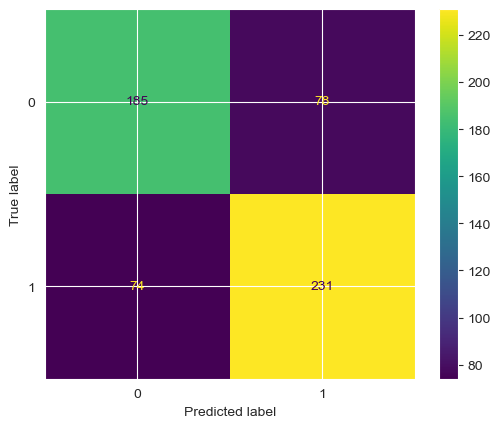

In [308]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

## Decision Tree

In [309]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [310]:
# Load the model
dt_model = DecisionTreeClassifier()

In [311]:
# Fit the model
dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [312]:
# Obtain the predictions for the validation data
pred_test = dt_model.predict(X_test)

In [313]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0) # Use zero_devision to control warnings


In [314]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 61.09 %
Weighted Avg F1-score = 0.6106


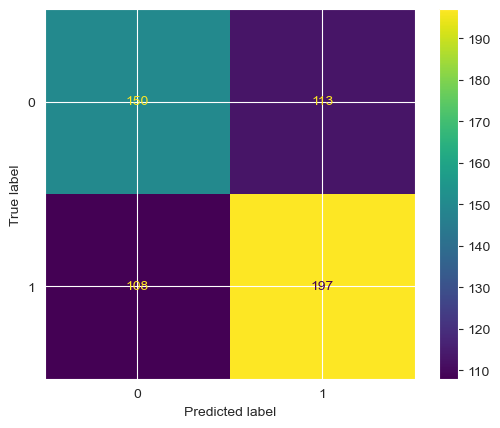

In [315]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

## Support Vector Machine (SVM)

In [316]:
# Import the necessary libraries

from sklearn.svm import SVC # Support Vector Machine for Classification

In [317]:
# Load the model
svc_model = SVC()


In [318]:
# Fit the model
svc_model.fit(X=X_train, y=y_train)

SVC()

In [319]:
# Obtain the predictions for the validation data
pred_test = svc_model.predict(X_test)

In [320]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0) # Use zero_devision to control warnings


In [321]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 73.94 %
Weighted Avg F1-score = 0.7396


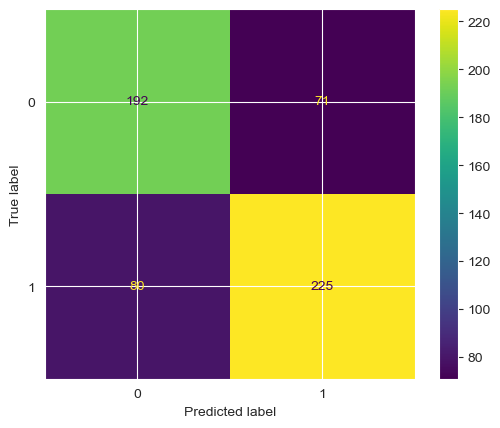

In [207]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

# Use logistic Regression

In [208]:
model = LogisticRegression().fit(X,df1['label'])
model.score(X,df1['label'])

0.8763213530655392

In [209]:
def predictor(text):
    processed = preprocess_text(text)
    embedded_words = vectorizer.transform([text])
    res = model.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

In [210]:
text1 = """This is the worst thing that happened to me today. I got less marks in my exam, 
            so it is not going to help me in my future."""
text2 = """Hi Shashank sir, I gained a lot of knowledge from you for my future use. 
            This was a very fun journey for me. Thanks for boosting my confidence."""

In [211]:
print(predictor(text1))
print(predictor(text2))

this person is in stress
this person is not in stress


In [226]:
text3 = 'I am not happy now'

In [228]:
print(predictor(text3))

this person is in stress


In [232]:
text4 = 'I am not happy now'

In [233]:
print(predictor(text4))

this person is in stress
